# Импорт библиотек

In [131]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,  SGDRegressor, BayesianRidge  
from sklearn.model_selection import cross_validate, cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Загрузка исходных данных

In [98]:
df_bp = pd.read_excel('/content/drive/MyDrive/VKR/X_bp.xlsx', sheet_name='X_bp.csv', index_col=0)
df_bp

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [99]:
df_nup = pd.read_excel('/content/drive/MyDrive/VKR/X_nup.xlsx', sheet_name='X_nup.csv', index_col=0)
df_nup.head(20)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.0,57.0
1.0,0.0,4.0,60.0
2.0,0.0,4.0,70.0
3.0,0.0,5.0,47.0
4.0,0.0,5.0,57.0
5.0,0.0,5.0,60.0
6.0,0.0,5.0,70.0
7.0,0.0,7.0,47.0
8.0,0.0,7.0,57.0
9.0,0.0,7.0,60.0


Все три признака, представленные в датасете df_nup по первым 20 значениям можно расценивать как дискретные, что вполне оправдано для представленных категорий, однако в диапазоне от 20 и до 1022 данные в колонках "Плотность нашивки" и "Шаг нашивки" представлены непрерывными значениями.
Возможно, данные в диапазоне (20; 1022) были подвергнуты преобразованию.


Объединение данных в один датафрейм

In [100]:
df1 = df_bp.join(df_nup,  how='inner')
df1.head(20)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.000000,3000.000000,220.0,0.0,4.0,57.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.000000,3000.000000,220.0,0.0,4.0,60.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.000000,3000.000000,220.0,0.0,4.0,70.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.000000,3000.000000,220.0,0.0,5.0,47.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0.0,5.0,57.0
5.0,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0.0,5.0,60.0
6.0,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0.0,5.0,70.0
7.0,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.000000,1800.000000,120.0,0.0,7.0,47.0
8.0,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.000000,1800.000000,120.0,0.0,7.0,57.0
9.0,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.000000,2000.000000,300.0,0.0,7.0,60.0


Разделим наш датафрейм на три и произведем обучение моделей на двух датафреймах и сопоставим результаты:
Датафрейм № 1 - объединенный по индексам датасет без разделения;
Датафрейм № 2 - объединенный по индексам датасет из первых 39 строк с дискретными значениями;
Датафрейм № 3 - экспериментальный, исключающий все дискретные значения;

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

In [102]:
# проверяем наличие дубликатов в данных
df1.duplicated().sum()

0

In [103]:
# подсчет уникальных значеий по каждому признаку
df1.apply(lambda x: x.nunique())

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Визуализация входных данных. Гистограммы распределения значений признаков

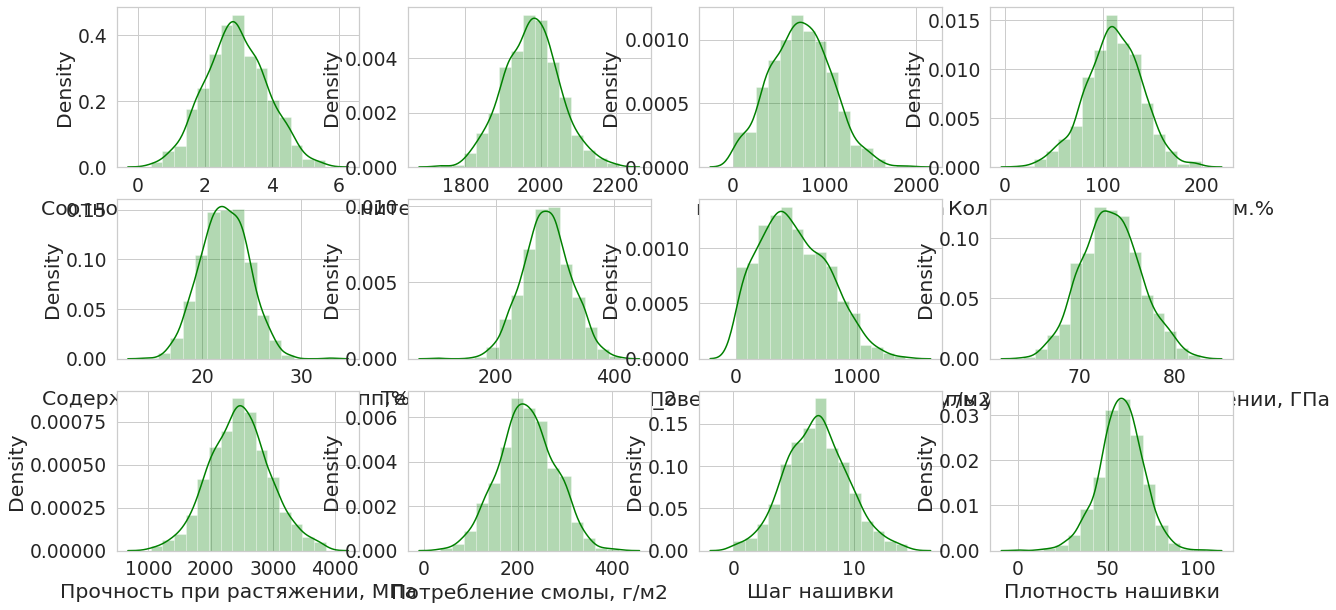

In [104]:
plt.figure(figsize=(20,10))
plt.subplot(3, 4, 1)
sns.distplot(df1['Соотношение матрица-наполнитель'],color="green", bins=15, hist_kws={'alpha':0.3})
plt.subplot(3, 4, 2)
sns.distplot(df1['Плотность, кг/м3'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 3)
sns.distplot(df1['модуль упругости, ГПа'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 4)
sns.distplot(df1['Количество отвердителя, м.%'], color="green", bins=15, hist_kws={'alpha':0.3})
plt.subplot(3, 4, 5)
sns.distplot(df1['Содержание эпоксидных групп,%_2'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 6)
sns.distplot(df1['Температура вспышки, С_2'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 7)
sns.distplot(df1['Поверхностная плотность, г/м2'], color="green", bins=15, hist_kws={'alpha':0.3})
plt.subplot(3, 4, 8)
sns.distplot(df1['Модуль упругости при растяжении, ГПа'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 9)
sns.distplot(df1['Прочность при растяжении, МПа'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 10)
sns.distplot(df1['Потребление смолы, г/м2'],color="green", bins=15, hist_kws={'alpha':0.3})
plt.subplot(3, 4, 11)
sns.distplot(df1['Шаг нашивки'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 12)
sns.distplot(df1['Плотность нашивки'],color="green",bins=15,hist_kws={'alpha':0.3})

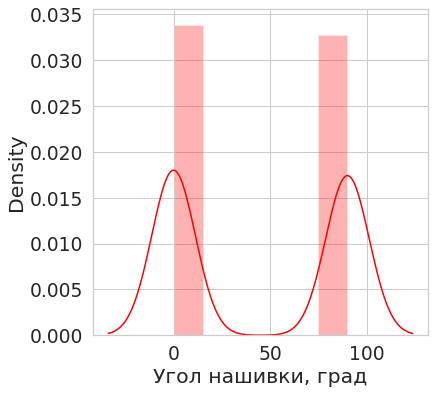

In [105]:
plt.figure(figsize=(6,6))
plt.subplot(1, 1, 1)
sns.distplot(df1['Угол нашивки, град'],color="red", hist_kws={'alpha':0.3})

параметр "Угол нашивки" имеет два дискретных значения, которые представлены примерно в равных пропорциях

данные в большинстве своем имеют, распределение, близкое к нормальному за исключением параметра "Угол нашивки", где определены только два дискретных значения: 0 и 90 град.

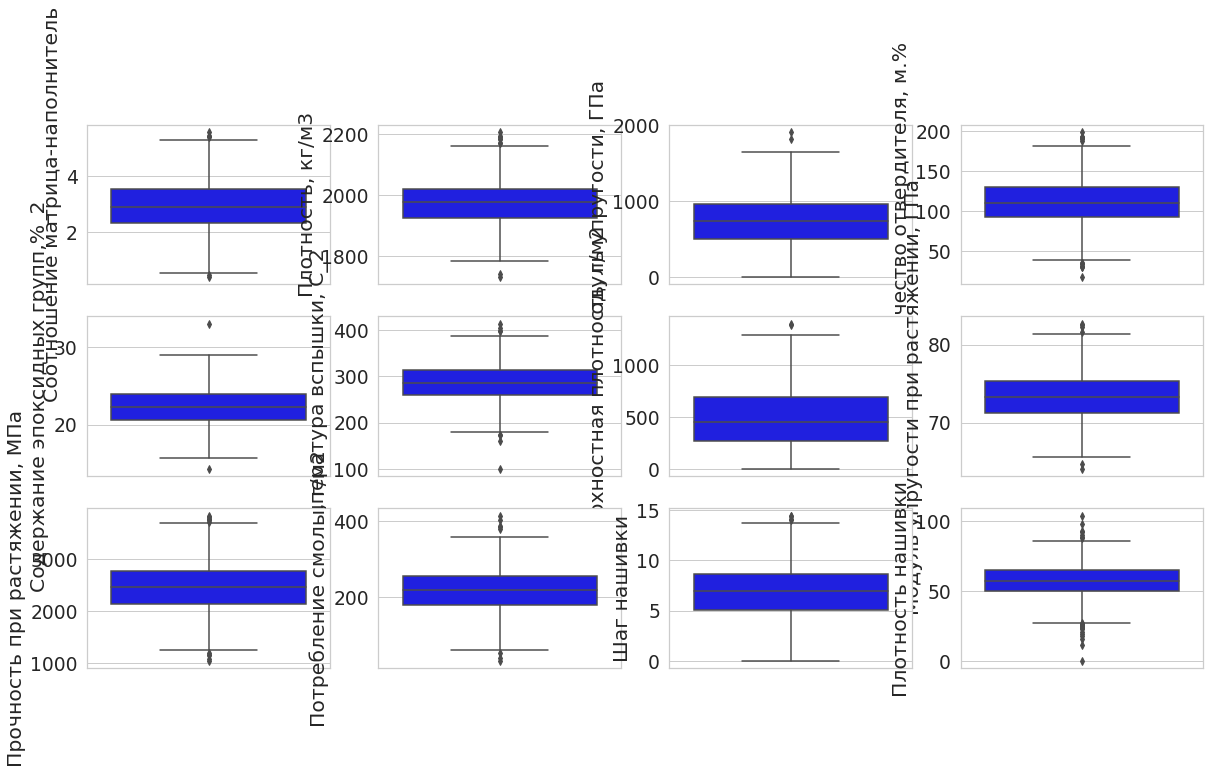

In [106]:
# строим боксплоты (ящики с усами)
plt.figure(figsize=(20,10))
plt.subplot(3, 4, 1)
sns.boxplot(y='Соотношение матрица-наполнитель', data=df1, color="blue")
plt.subplot(3, 4, 2)
sns.boxplot(y='Плотность, кг/м3', data=df1, color="blue")
plt.subplot(3, 4, 3)
sns.boxplot(y='модуль упругости, ГПа', data=df1, color="blue")
plt.subplot(3, 4, 4)
sns.boxplot(y='Количество отвердителя, м.%', data=df1, color="blue")
plt.subplot(3, 4, 5)
sns.boxplot(y='Содержание эпоксидных групп,%_2', data=df1, color="blue")
plt.subplot(3, 4, 6)
sns.boxplot(y='Температура вспышки, С_2', data=df1, color="blue")
plt.subplot(3, 4, 7)
sns.boxplot(y='Поверхностная плотность, г/м2', data=df1, color="blue")
plt.subplot(3, 4, 8)
sns.boxplot(y='Модуль упругости при растяжении, ГПа', data=df1, color="blue")
plt.subplot(3, 4, 9)
sns.boxplot(y='Прочность при растяжении, МПа', data=df1, color="blue")
plt.subplot(3, 4, 10)
sns.boxplot(y='Потребление смолы, г/м2', data=df1, color="blue")
plt.subplot(3, 4, 11)
sns.boxplot(y='Шаг нашивки', data=df, color="blue")
plt.subplot(3, 4, 12)
sns.boxplot(y='Плотность нашивки', data=df1, color="blue")

Обнаружены выбросы во всех параметрах, наиюольшее количество в колонках "Плотность", "Плотность нашивки", "Потребление смолы" и "Температура вспышки"

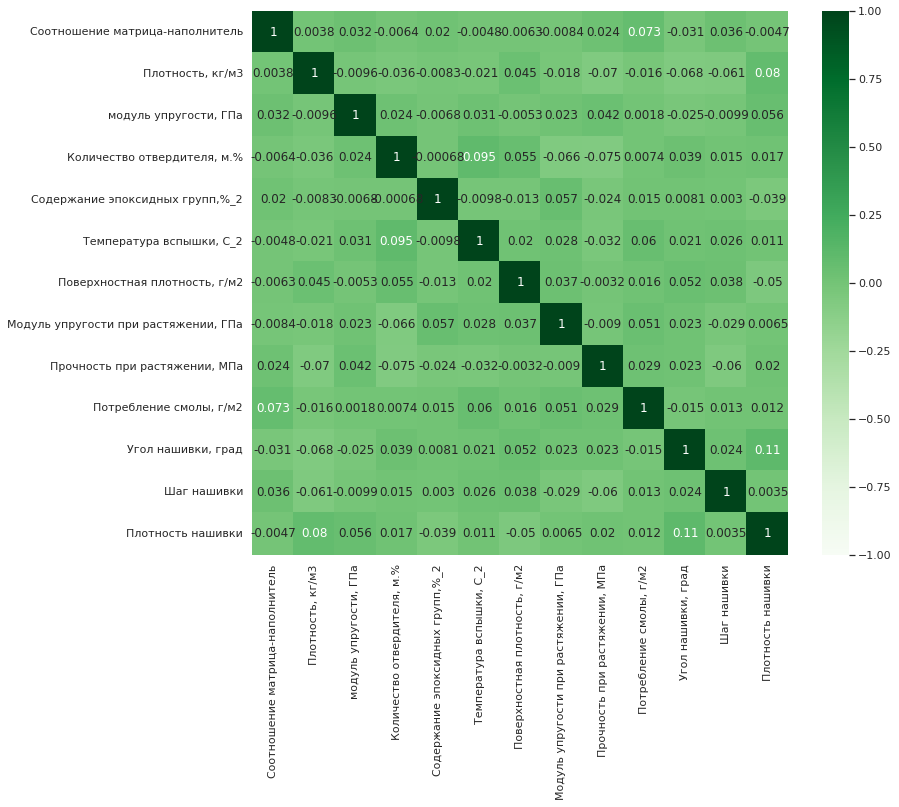

In [107]:
# строим матрицу корреляции
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(df1.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'Greens')

Изучив матрицу корреляции наблюдаем довольно малые значения, что говорит об отсуствии линейной зависимости между признаками. Предположим наличие нелинейной сложной зависимости между признаками

Строим матрицу рассеивания точек

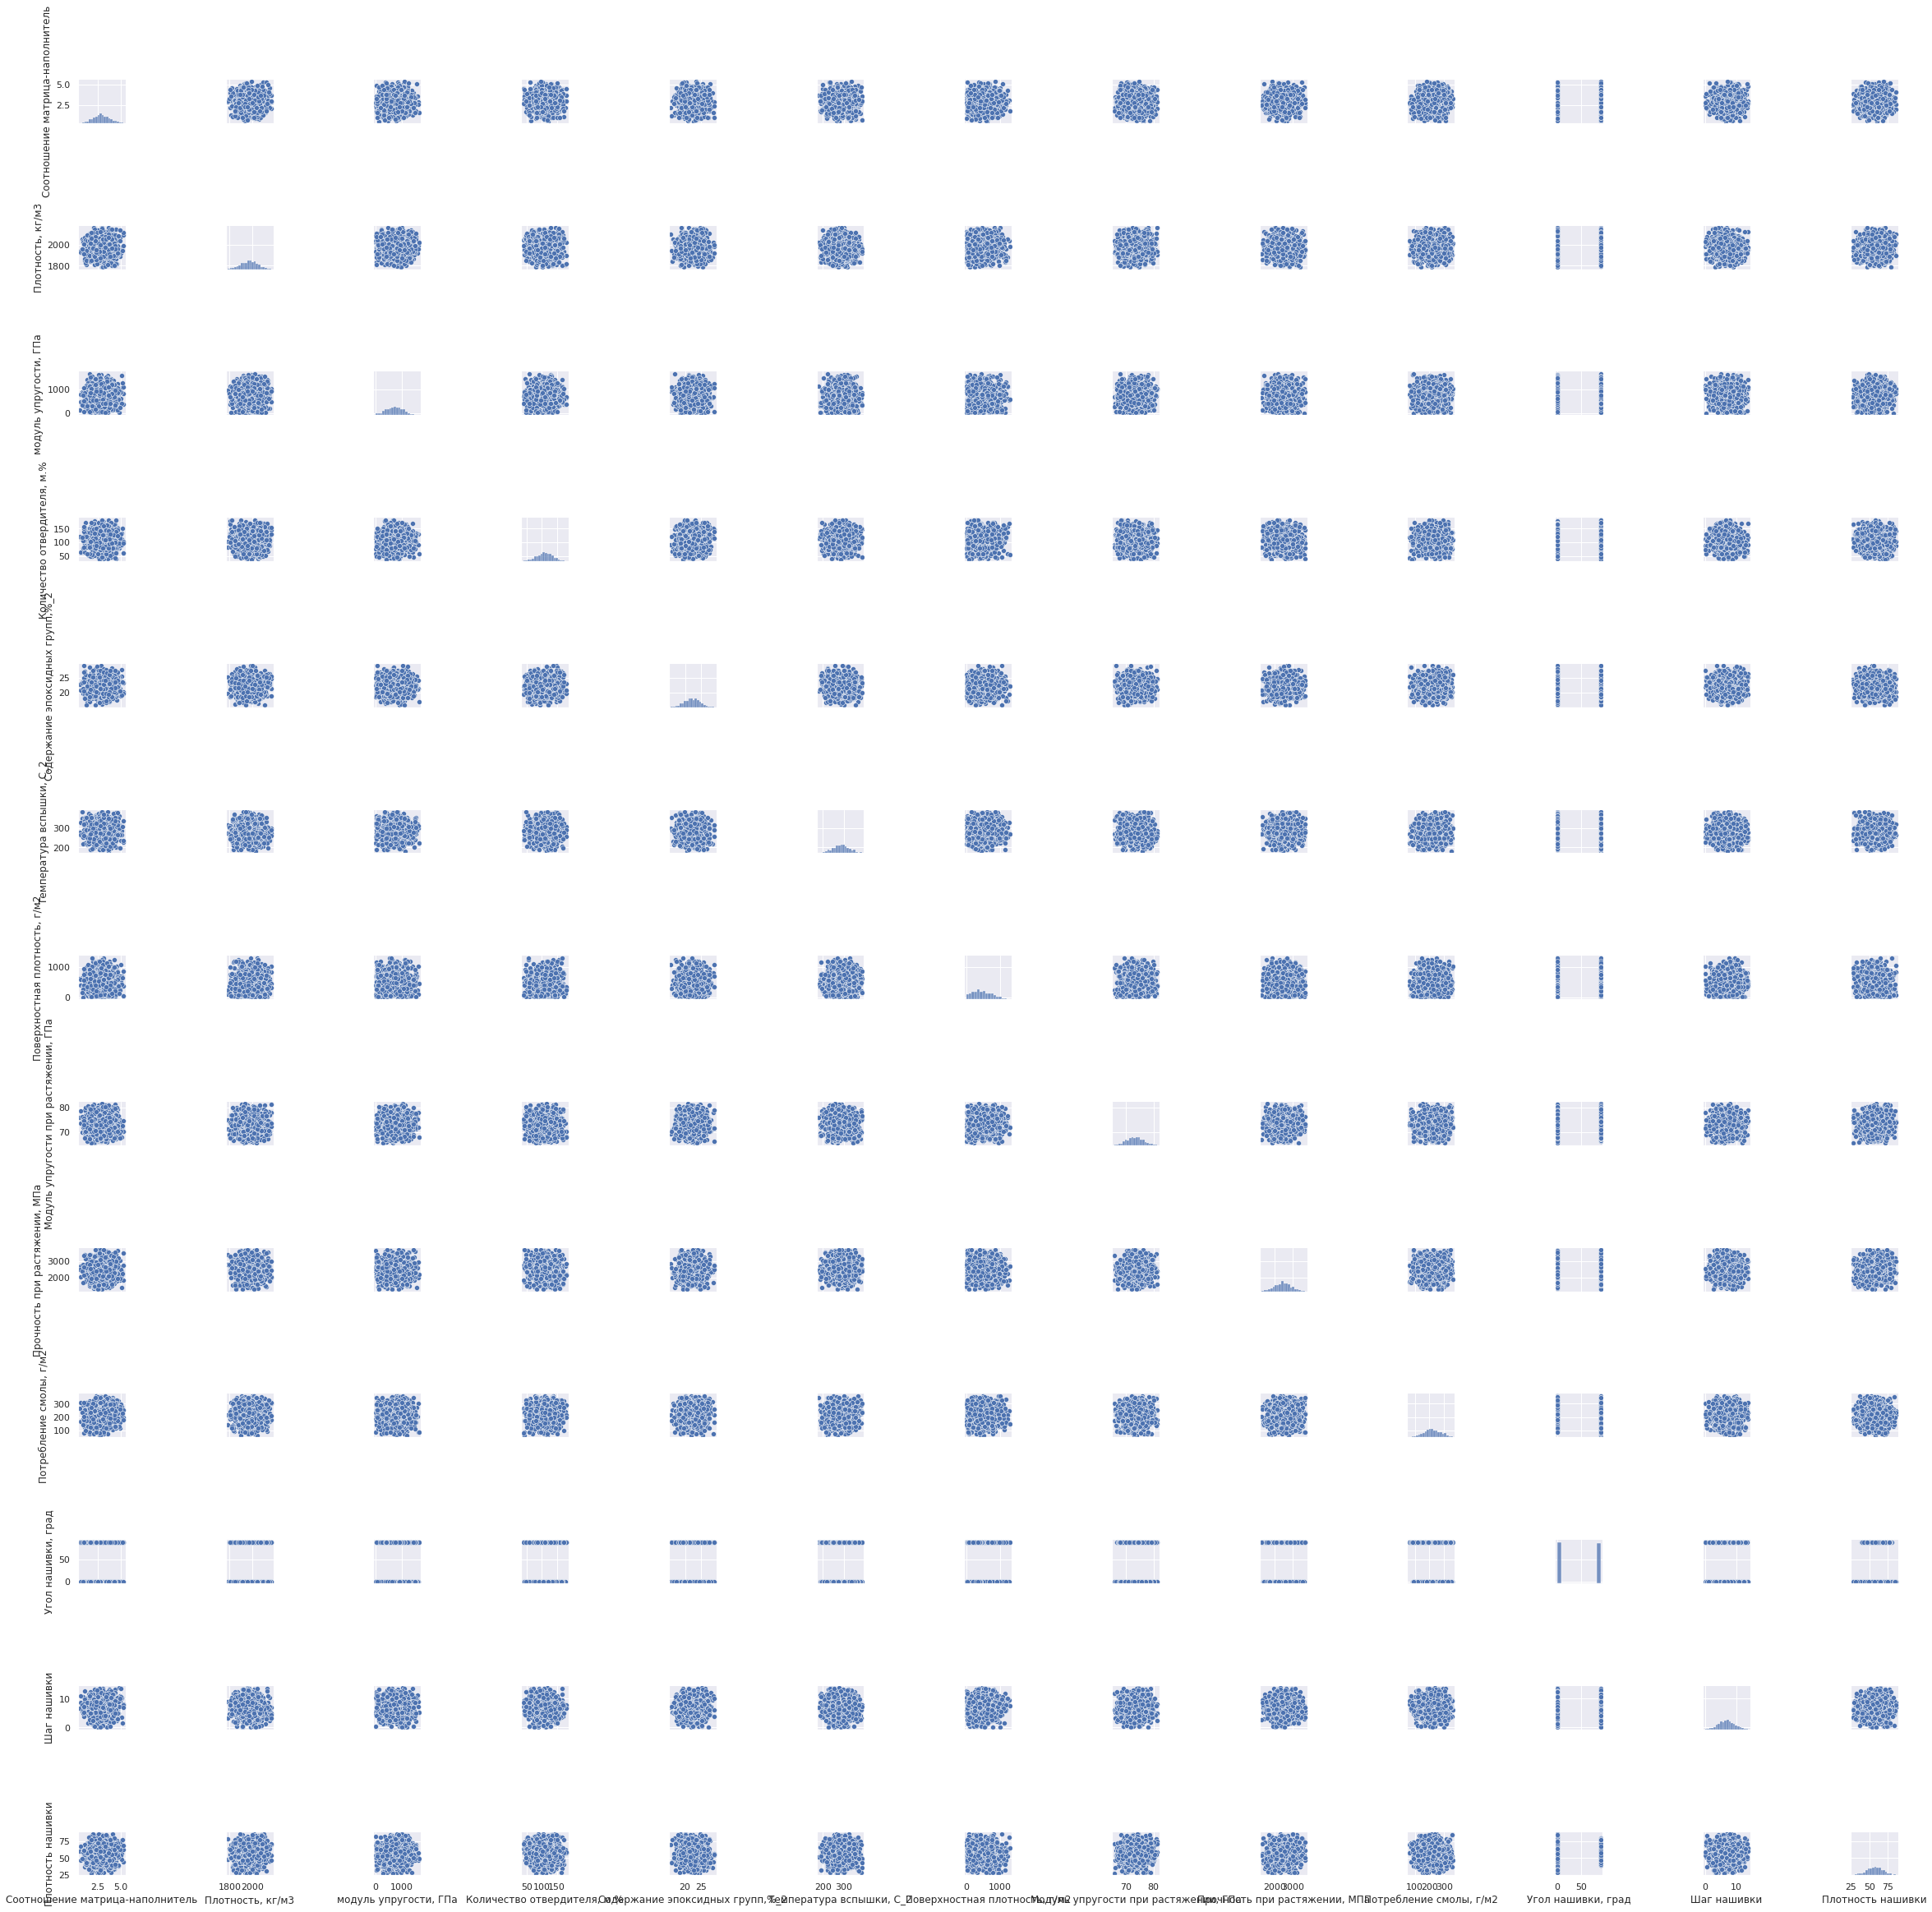

In [126]:
col = df1.columns
m_pair_grid = sns.pairplot(df1[col])

In [109]:
# проверка наличия пропусков в данных
df1.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропусков в данных нет, но обнаружены выбросы во всех компонентах (колонках) датасета, кроме Угла нашивки.

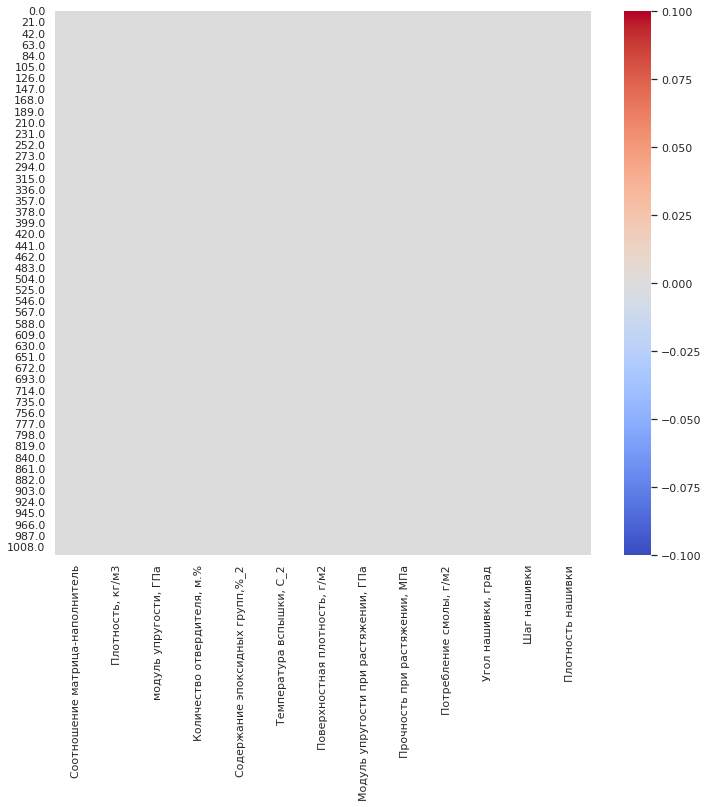

In [110]:
sns.heatmap(df1.isnull(),cmap="coolwarm")
plt.show()

## Удаление выбросов

In [111]:
for col in df1.columns:
  quant_3,quant_1 = np.percentile(df1.loc[:,col],[75,25])
  iqr = quant_3-quant_1

  max = quant_3+(1.5*iqr)
  min = quant_1-(1.5*iqr)

  df1.loc[df1[col] < min,col] = np.nan
  df1.loc[df1[col] > max,col] = np.nan

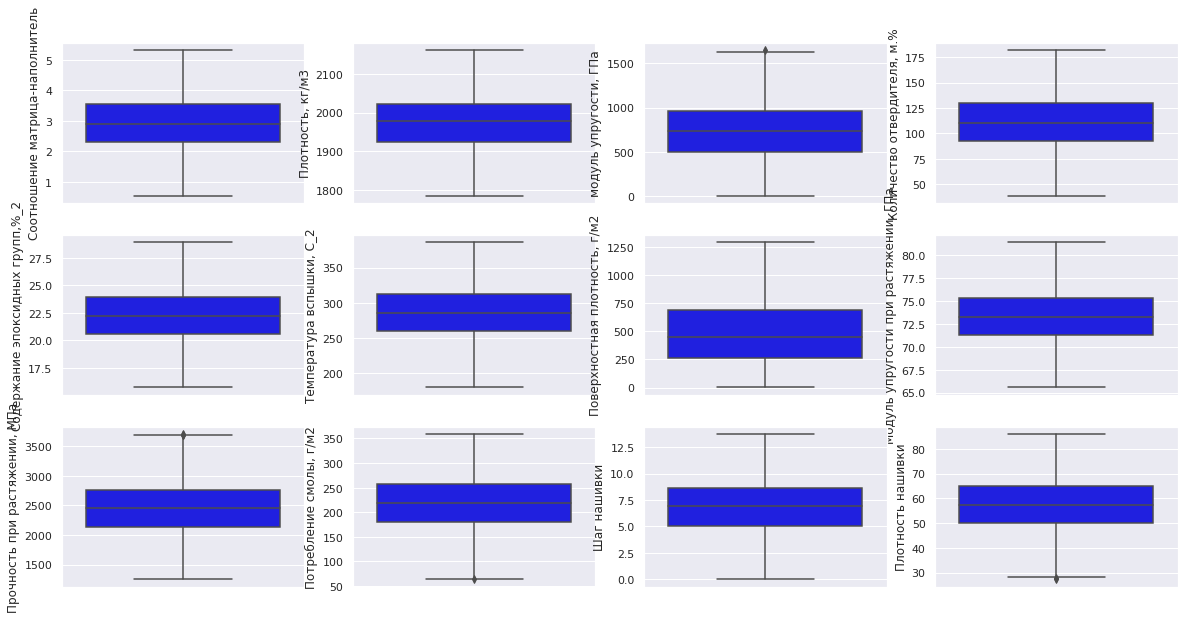

In [112]:
# Построение бокспотов после удаления выбросов
plt.figure(figsize=(20,10))
plt.subplot(3, 4, 1)
sns.boxplot(y='Соотношение матрица-наполнитель', data=df1, color="blue")
plt.subplot(3, 4, 2)
sns.boxplot(y='Плотность, кг/м3', data=df1, color="blue")
plt.subplot(3, 4, 3)
sns.boxplot(y='модуль упругости, ГПа', data=df1, color="blue")
plt.subplot(3, 4, 4)
sns.boxplot(y='Количество отвердителя, м.%', data=df1, color="blue")
plt.subplot(3, 4, 5)
sns.boxplot(y='Содержание эпоксидных групп,%_2', data=df1, color="blue")
plt.subplot(3, 4, 6)
sns.boxplot(y='Температура вспышки, С_2', data=df1, color="blue")
plt.subplot(3, 4, 7)
sns.boxplot(y='Поверхностная плотность, г/м2', data=df1, color="blue")
plt.subplot(3, 4, 8)
sns.boxplot(y='Модуль упругости при растяжении, ГПа', data=df1, color="blue")
plt.subplot(3, 4, 9)
sns.boxplot(y='Прочность при растяжении, МПа', data=df1, color="blue")
plt.subplot(3, 4, 10)
sns.boxplot(y='Потребление смолы, г/м2', data=df1, color="blue")
plt.subplot(3, 4, 11)
sns.boxplot(y='Шаг нашивки', data=df1, color="blue")
plt.subplot(3, 4, 12)
sns.boxplot(y='Плотность нашивки', data=df1, color="blue")

In [181]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1017.0,2.925257,0.894926,0.547391,2.319166,2.906383,3.550392,5.314144
"Плотность, кг/м3",1014.0,1974.755152,71.156559,1784.482245,1924.134147,1977.450684,2020.969209,2161.565216
"модуль упругости, ГПа",1021.0,737.721905,326.773868,2.436909,498.596429,738.957167,957.395628,1649.415706
"Количество отвердителя, м.%",1009.0,110.558048,26.846173,38.668500,92.618011,110.564840,129.442140,181.828448
"Содержание эпоксидных групп,%_2",1021.0,22.241680,2.371843,15.695894,20.608609,22.230744,23.961702,28.955094
"Температура вспышки, С_2",1015.0,285.949508,39.510454,179.374391,259.211711,285.896812,312.766177,386.067992
"Поверхностная плотность, г/м2",1021.0,480.944261,278.670119,0.603740,266.492473,451.313045,692.271085,1291.340115
"Модуль упругости при растяжении, ГПа",1017.0,73.311050,3.051631,65.553336,71.252628,73.264735,75.336532,81.417126
"Прочность при растяжении, МПа",1012.0,2465.769701,468.005025,1250.392802,2139.815229,2457.959767,2760.163022,3705.672523
"Потребление смолы, г/м2",1015.0,218.081180,57.908978,63.685698,179.766002,219.179155,257.106878,359.052220


In [113]:
# проверка наличия пропусков
df1.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

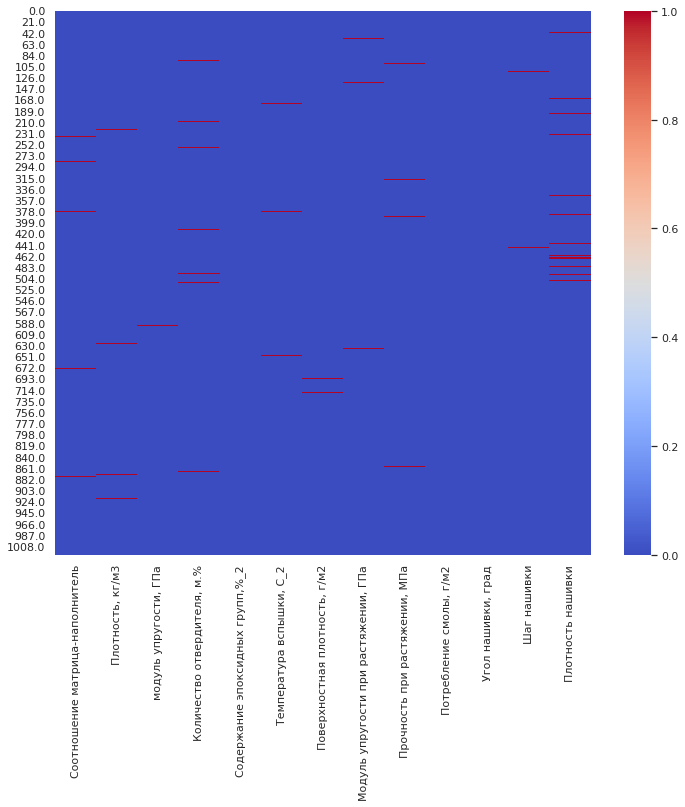

In [114]:
sns.heatmap(df1.isnull(),cmap="coolwarm")
plt.show()

Выбросы устранены, но данные по различным признакам имеют большой разброс. Произведем нормализацию данных для приведения значений признаков к диапазону (0; 1)

In [115]:
# удаление строк с пробелами
df_full = df1.dropna()

In [116]:
df_full

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
5.0,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,60.000000
6.0,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [117]:
# Нормализация. MinMaxScaler
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df_full), columns=df_full.columns, index=df_full.index)

In [118]:
df_norm.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [119]:
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,936.0,0.498933,0.187489,0.0,0.372274,0.494538,0.629204,1.0
"Плотность, кг/м3",936.0,0.502695,0.187779,0.0,0.368517,0.511229,0.624999,1.0
"модуль упругости, ГПа",936.0,0.446764,0.199583,0.0,0.301243,0.447061,0.580446,1.0
"Количество отвердителя, м.%",936.0,0.504664,0.188865,0.0,0.376190,0.506040,0.637978,1.0
"Содержание эпоксидных групп,%_2",936.0,0.491216,0.180620,0.0,0.367716,0.489382,0.623410,1.0
"Температура вспышки, С_2",936.0,0.516059,0.190624,0.0,0.386128,0.515980,0.646450,1.0
"Поверхностная плотность, г/м2",936.0,0.373733,0.217078,0.0,0.205619,0.354161,0.538683,1.0
"Модуль упругости при растяжении, ГПа",936.0,0.488647,0.191466,0.0,0.359024,0.485754,0.615077,1.0
"Прочность при растяжении, МПа",936.0,0.495706,0.188915,0.0,0.365149,0.491825,0.612874,1.0
"Потребление смолы, г/м2",936.0,0.521141,0.195781,0.0,0.392067,0.523766,0.652447,1.0


# Построение моделей для целевой переменной "Модуль упругости при растяжении, ГПа"

In [120]:
# Определение факторов и целевых переменных Х и у; разделение датасета на train и test выборку 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score

X = df_norm.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'],
                 axis=1)  
y = df_norm['Модуль упругости при растяжении, ГПа'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

Функция обучения и оценки модели

In [121]:
def regression_fit(regressID, X, y, X_v, y_v):
  model = regressID
  model_fit = model.fit(X, y)
  model_score_train = model.score(X, y)
  model_score_test = model.score(X_v, y_v)
  y_pred = model.predict(X_v)
  mae = mean_absolute_error(y_v, y_pred)
  mse = mean_squared_error(y_v, y_pred)
  max_er = max_error(y_v, y_pred)
  r_2 = r2_score(y_v, y_pred)

  print("Train_score = ", model_score_train)
  print("Test_score = ", model_score_test)
  print("mean_absolute_error = ", mae)
  print("mean_squared_error = ", mse)
  print("Max error = ", max_er)
  print("R2_score = ", r_2)
  
  return mae, mse, max_er, r_2


In [122]:
# Функция обучения моделей с использованием кросс-валидации 
def regression_cv(regressID, X, y):
  shuffle_x = ShuffleSplit(n_splits=10, test_size=0.3, random_state=20)
  model_cv = cross_validate(estimator=regressID, X=X, y=y, cv=shuffle_x, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'))
  mae = model_cv['test_neg_mean_absolute_error'].mean()
  mse = model_cv['test_neg_mean_squared_error'].mean()
  r_2 = model_cv['test_r2'].mean()

  print("mean_absolute_error = ", mae)
  print("mean_squared_error = ", mse)
  print("R2_score = ", r_2)
  
  return mae, mse, r_2

Линейная регрессия

In [123]:
regressor_lr = LinearRegression()
lr = regression_fit(regressID=regressor_lr, X=X_train, y=y_train, X_v=X_test, y_v=y_test)

Train_score =  0.008583573728511484
Test_score =  0.00624539378575828
mean_absolute_error =  0.14666569800657275
mean_squared_error =  0.03361523598300351
Max error =  0.4826187624995759
R2_score =  0.00624539378575828


In [124]:
results_lr = regression_cv(regressID=regressor_lr, X=X, y=y)

mean_absolute_error =  -0.15585245385694038
mean_squared_error =  -0.03742360655721959
R2_score =  -0.021028133132826966


In [125]:
regressor_lasso = Lasso(alpha=0.1)
lasso = regression_fit(regressID=regressor_lasso, X=X_train, y=y_train, X_v=X_test, y_v=y_test)

Train_score =  0.0
Test_score =  -0.001437885728528876
mean_absolute_error =  0.14727429050767143
mean_squared_error =  0.033875134404989245
Max error =  0.4999583728958316
R2_score =  -0.001437885728528876


In [127]:
results_lasso = regression_cv(regressID=regressor_lasso, X=X, y=y)

mean_absolute_error =  -0.15428184504995324
mean_squared_error =  -0.03678569819668629
R2_score =  -0.0036325123290413598


In [128]:
regressor_br = BayesianRidge(n_iter=100)
bayes_ridge = regression_fit(regressID=regressor_br, X=X_train, y=y_train, X_v=X_test, y_v=y_test)


Train_score =  0.00027138296233730763
Test_score =  -0.0010668308984318475
mean_absolute_error =  0.14726541192940218
mean_squared_error =  0.03386258292034873
Max error =  0.5000977520444629
R2_score =  -0.0010668308984318475


In [129]:
results_br = regression_cv(regressID=regressor_br, X=X, y=y)

mean_absolute_error =  -0.15441374106382993
mean_squared_error =  -0.036829243710324554
R2_score =  -0.0048500085515491564


In [133]:
regressor_xgb = XGBRegressor(max_depth=2, random_state=20)
result_xgb = regression_cv(regressID=regressor_xgb, X=X, y=y)

[20:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [138]:
regressor_rf = RandomForestRegressor(n_estimators=200)
rfr = regression_fit(regressID=regressor_rf, X=X_train, y=y_train, X_v=X_test, y_v=y_test)


Train_score =  0.8513469166037049
Test_score =  -0.030716010222453516
mean_absolute_error =  0.1475789838042185
mean_squared_error =  0.034865510759321185
Max error =  0.49454994769632027
R2_score =  -0.030716010222453516


In [139]:
result_rfr = regression_cv(regressID=regressor_rf, X=X, y=y)

mean_absolute_error =  -0.15776000550821725
mean_squared_error =  -0.038776864839041233
R2_score =  -0.057924525110534184


Обучение с помощью линейных моделей: LinearRegression, Lasso, BayesianRidge; XGBoostRegression; RandomForestRegresion не принесло положительных результатов. Коэффициент детерминаци при всех процедурах обучения близок к нулю, что говорит о том, что оценка дает значение, близкое к среднему, а значит, модели не могут "объяснить" дисперсию таргета через признаки.

# Произведем подбор оптимальных гиперпараметов при помощи GridSearchCV и RandomizedSearchCV

In [140]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(regressor_rf, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=20)
rs.fit(X_train, y_train)
rs.best_params_
# {'n_estimators': 700,
# 'min_samples_split': 2,
# 'min_samples_leaf': 2,
# 'max_features': 'log2',
# 'max_depth': 11,
# 'bootstrap': True}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'max_depth': 1,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 23,
 'n_estimators': 400}

In [160]:
# Обучение модели
rfcv = RandomForestRegressor(bootstrap=True, max_depth=1, max_features='log2', min_samples_leaf=2, min_samples_split=23, n_estimators=400)
rfcv_train = rfcv.fit(X_train, y_train)
rfcv_predict = rfcv.predict(X_test)

In [161]:
# оценка работы модели
mae = mean_absolute_error(y_test, rfcv_predict)
mse = mean_squared_error(y_test, rfcv_predict)
max_er = max_error(y_test, rfcv_predict)
r_2 = r2_score(y_test, rfcv_predict)

print("mean_absolute_error = ", mae)
print("mean_squared_error = ", mse)
print("Max error = ", max_er)
print("R2_score = ", r_2)

mean_absolute_error =  0.14696469931135517
mean_squared_error =  0.03380593190930756
Max error =  0.49082686932697717
R2_score =  0.0006079216809439236


In [162]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
n_estimators = [300,500,700]
max_features = ['sqrt', 'log2']
max_depth = [2,3,7,11,15]
min_samples_split = [2,3,4,22,23,24]
min_samples_leaf = [2,3,4,5,6,7]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(regressor_rf, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train, y_train)
rfc = gs.best_estimator_
gs.best_params_
# {'bootstrap': False,
# 'max_depth': 7,
# 'max_features': 'sqrt',
# 'min_samples_leaf': 3,
# 'min_samples_split': 2,
# 'n_estimators': 500}

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


{'bootstrap': False,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 24,
 'n_estimators': 700}

In [163]:
# Обучение модели
gscv = RandomForestRegressor(bootstrap=False, max_depth=2, max_features='sqrt', min_samples_leaf=3, min_samples_split=24, n_estimators=700)
gscv_train = gscv.fit(X_train, y_train)
gscv_predict = gscv.predict(X_test)

In [164]:
# оценка работы модели
mae = mean_absolute_error(y_test, gscv_predict)
mse = mean_squared_error(y_test, gscv_predict)
max_er = max_error(y_test, gscv_predict)
r_2 = r2_score(y_test, gscv_predict)

print("mean_absolute_error = ", mae)
print("mean_squared_error = ", mse)
print("Max error = ", max_er)
print("R2_score = ", r_2)

mean_absolute_error =  0.14671729018147806
mean_squared_error =  0.03368440469584738
Max error =  0.49149904452142706
R2_score =  0.004200585085642028


Оба инструмента поиска оптимальных гиперпараметров для модели показали неудовлетворительные результаты. 

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(  ['Соотношение матрица-наполнитель'],color="green", bins=15, hist_kws={'alpha':0.3})
plt.subplot(3, 4, 2)
sns.distplot(df1['Плотность, кг/м3'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 3)
sns.distplot(df1['модуль упругости, ГПа'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 4)

# Построение моделей для целевой переменной "Прочность при растяжении, МПа"

In [165]:
# Определение факторов и целевых переменных Х и у; разделение датасета на train и test выборку 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score

X = df_norm.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'],
                 axis=1)  
y = df_norm['Прочность при растяжении, МПа'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

Функция обучения и оценки модели

In [166]:
def regression_fit(regressID, X, y, X_v, y_v):
  model = regressID
  model_fit = model.fit(X, y)
  model_score_train = model.score(X, y)
  model_score_test = model.score(X_v, y_v)
  y_pred = model.predict(X_v)
  mae = mean_absolute_error(y_v, y_pred)
  mse = mean_squared_error(y_v, y_pred)
  max_er = max_error(y_v, y_pred)
  r_2 = r2_score(y_v, y_pred)

  print("Train_score = ", model_score_train)
  print("Test_score = ", model_score_test)
  print("mean_absolute_error = ", mae)
  print("mean_squared_error = ", mse)
  print("Max error = ", max_er)
  print("R2_score = ", r_2)
  
  return mae, mse, max_er, r_2


In [167]:
# Функция обучения моделей с использованием кросс-валидации 
def regression_cv(regressID, X, y):
  shuffle_x = ShuffleSplit(n_splits=10, test_size=0.3, random_state=20)
  model_cv = cross_validate(estimator=regressID, X=X, y=y, cv=shuffle_x, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'))
  mae = model_cv['test_neg_mean_absolute_error'].mean()
  mse = model_cv['test_neg_mean_squared_error'].mean()
  r_2 = model_cv['test_r2'].mean()

  print("mean_absolute_error = ", mae)
  print("mean_squared_error = ", mse)
  print("R2_score = ", r_2)
  
  return mae, mse, r_2

Линейная регрессия

In [168]:
regressor_lr = LinearRegression()
lr = regression_fit(regressID=regressor_lr, X=X_train, y=y_train, X_v=X_test, y_v=y_test)

Train_score =  0.01792715495916075
Test_score =  0.0017522519669334047
mean_absolute_error =  0.1528141415074883
mean_squared_error =  0.035335981694218
Max error =  0.48424911747281674
R2_score =  0.0017522519669334047


In [169]:
results_lr = regression_cv(regressID=regressor_lr, X=X, y=y)

mean_absolute_error =  -0.15208445883552132
mean_squared_error =  -0.035703753920947504
R2_score =  -0.014982585382579582


In [170]:
regressor_lasso = Lasso(alpha=0.1)
lasso = regression_fit(regressID=regressor_lasso, X=X_train, y=y_train, X_v=X_test, y_v=y_test)

Train_score =  0.0
Test_score =  -0.005565272873978788
mean_absolute_error =  0.1525562739890178
mean_squared_error =  0.035595007496515015
Max error =  0.4643407004305627
R2_score =  -0.005565272873978788


In [171]:
results_lasso = regression_cv(regressID=regressor_lasso, X=X, y=y)

mean_absolute_error =  -0.15041266775951287
mean_squared_error =  -0.035297998782570214
R2_score =  -0.003711195054076888


In [172]:
regressor_br = BayesianRidge(n_iter=100)
bayes_ridge = regression_fit(regressID=regressor_br, X=X_train, y=y_train, X_v=X_test, y_v=y_test)


Train_score =  0.0005615752444921851
Test_score =  -0.005165812552526461
mean_absolute_error =  0.15253963773018062
mean_squared_error =  0.03558086739689124
Max error =  0.46393602367914555
R2_score =  -0.005165812552526461


In [173]:
results_br = regression_cv(regressID=regressor_br, X=X, y=y)

mean_absolute_error =  -0.15078399326339217
mean_squared_error =  -0.03537471846047456
R2_score =  -0.005798729870103469


In [174]:
regressor_xgb = XGBRegressor(max_depth=2, random_state=20)
result_xgb = regression_cv(regressID=regressor_xgb, X=X, y=y)

[22:14:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:14:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:14:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:14:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:14:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:14:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:14:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:14:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [175]:
regressor_rf = RandomForestRegressor(n_estimators=200)
rfr = regression_fit(regressID=regressor_rf, X=X_train, y=y_train, X_v=X_test, y_v=y_test)


Train_score =  0.8572481732885627
Test_score =  -0.03665505842587491
mean_absolute_error =  0.15465515160545498
mean_squared_error =  0.036695523971812465
Max error =  0.48416750030390976
R2_score =  -0.03665505842587491


In [176]:
result_rfr = regression_cv(regressID=regressor_rf, X=X, y=y)

mean_absolute_error =  -0.15458297791883144
mean_squared_error =  -0.036588457568125655
R2_score =  -0.040297613150012346


Обучение с помощью линейных моделей: LinearRegression, Lasso, BayesianRidge; XGBoostRegression; RandomForestRegresion не принесло положительных результатов. Коэффициент детерминаци при всех процедурах обучения близок к нулю, что говорит о том, что оценка дает значение, близкое к среднему, а значит, модели не могут "объяснить" дисперсию таргета через признаки.

# Произведем подбор оптимальных гиперпараметов при помощи GridSearchCV и RandomizedSearchCV

In [177]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(regressor_rf, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=20)
rs.fit(X_train, y_train)
rs.best_params_
# {'n_estimators': 700,
# 'min_samples_split': 2,
# 'min_samples_leaf': 2,
# 'max_features': 'log2',
# 'max_depth': 11,
# 'bootstrap': True}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'min_samples_split': 18,
 'n_estimators': 100}

In [178]:
# Обучение модели
rfcv = RandomForestRegressor(bootstrap=True, max_depth=5, max_features='sqrt', min_samples_leaf=50, min_samples_split=18, n_estimators=100)
rfcv_train = rfcv.fit(X_train, y_train)
rfcv_predict = rfcv.predict(X_test)

In [179]:
# оценка работы модели
mae = mean_absolute_error(y_test, rfcv_predict)
mse = mean_squared_error(y_test, rfcv_predict)
max_er = max_error(y_test, rfcv_predict)
r_2 = r2_score(y_test, rfcv_predict)

print("mean_absolute_error = ", mae)
print("mean_squared_error = ", mse)
print("Max error = ", max_er)
print("R2_score = ", r_2)

mean_absolute_error =  0.1516731696949498
mean_squared_error =  0.0350477083614567
Max error =  0.4654445759360307
R2_score =  0.00989602472913298


In [184]:
models = pd.DataFrame()

In [180]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
n_estimators = [300,500,700]
max_features = ['sqrt', 'log2']
max_depth = [2,3,7,11,15]
min_samples_split = [2,3,4,22,23,24]
min_samples_leaf = [2,3,4,5,6,7]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(regressor_rf, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train, y_train)
rfc = gs.best_estimator_
gs.best_params_
# {'bootstrap': False,
# 'max_depth': 7,
# 'max_features': 'sqrt',
# 'min_samples_leaf': 3,
# 'min_samples_split': 2,
# 'n_estimators': 500}

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


{'bootstrap': False,
 'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'min_samples_split': 4,
 'n_estimators': 300}

In [182]:
# Обучение модели
gscv = RandomForestRegressor(bootstrap=False, max_depth=2, max_features='log2', min_samples_leaf=7, min_samples_split=4, n_estimators=300)
gscv_train = gscv.fit(X_train, y_train)
gscv_predict = gscv.predict(X_test)

In [183]:
# оценка работы модели
mae = mean_absolute_error(y_test, gscv_predict)
mse = mean_squared_error(y_test, gscv_predict)
max_er = max_error(y_test, gscv_predict)
r_2 = r2_score(y_test, gscv_predict)

print("mean_absolute_error = ", mae)
print("mean_squared_error = ", mse)
print("Max error = ", max_er)
print("R2_score = ", r_2)

mean_absolute_error =  0.15243949658363845
mean_squared_error =  0.035373438891071626
Max error =  0.46906859903564146
R2_score =  0.0006940795145494727


Оба инструмента поиска оптимальных гиперпараметров для модели показали неудовлетворительные результаты. Возможно, причина в недостоверных исходных данных, которые имеют признаки предобработки

### Нейронная сеть для параметра "Соотношение Матрица/Наполнитель"

In [31]:
# загружаем бибилиотеки Tenzorflow Keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [77]:
# определяем входные и выходной параметры
X = df_norm.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Соотношение матрица-наполнитель'],
                 axis=1)  
y = df_norm['Соотношение матрица-наполнитель'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

In [78]:
X_train = X_train.astype('float32')

In [80]:
norm = tf.keras.layers.Normalization(axis=-1)

In [81]:
X_np = norm.adapt(np.array(X_train))

In [82]:
X_np

In [83]:
y_np = np.array(y_train)
y_np

array([6.66213821e-01, 7.74231184e-01, 4.19591337e-01, 5.98430180e-01,
       8.03909851e-01, 3.62467030e-01, 7.41903986e-01, 8.10843008e-01,
       3.44000303e-01, 3.80554957e-01, 5.04372478e-01, 5.12933780e-01,
       7.14888078e-01, 5.88949093e-01, 3.80239825e-01, 3.81833137e-01,
       4.92098106e-01, 2.62178918e-01, 2.79161688e-01, 3.76899725e-01,
       4.10315394e-01, 4.19591033e-01, 7.55351844e-01, 6.80266101e-01,
       2.75970720e-01, 4.07115256e-01, 8.11400348e-01, 6.44338609e-01,
       7.31270117e-01, 6.82404219e-01, 4.47069168e-01, 5.13134344e-01,
       6.94623158e-01, 4.09364976e-01, 6.37301188e-01, 4.87219538e-01,
       7.04138678e-01, 5.78621255e-01, 5.42660703e-01, 3.89371268e-01,
       8.71066551e-01, 6.56368451e-01, 7.16261554e-01, 5.71982070e-01,
       5.09973227e-01, 8.15184844e-01, 4.74041266e-01, 8.19967455e-01,
       4.21690634e-01, 5.05853935e-01, 5.17952689e-01, 3.89339350e-01,
       9.96160553e-01, 4.64052543e-01, 7.87643039e-01, 5.34751480e-01,
      

In [84]:
# строим модель нейронной сети
model = Sequential(X_np)

model.add(Dense(64))
model.add(Dense(64, activation='selu')) # входной слой 
model.add(Dense(64, activation='selu'))# скрытый слой
model.add(Dense(64, activation='selu')) # скрытый слой
model.add(Dense(64, activation='selu')) # скрытый слой
model.add(Dense(32, activation='selu')) # скрытый слой
model.add(Dense(1))


model.compile(loss = 'mean_absolute_error', 
              optimizer = tf.optimizers.Adam(0.002)) 


In [85]:
%%time
history = model.fit(X_train, 
                    y_train, 
                    batch_size=2,
                    epochs = 80,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/80
257/257 [==============================] - 2s 4ms/step - loss: 0.3417 - val_loss: 0.2419
Epoch 2/80
257/257 [==============================] - 1s 3ms/step - loss: 0.2466 - val_loss: 0.1821
Epoch 3/80
257/257 [==============================] - 1s 3ms/step - loss: 0.1888 - val_loss: 0.1717
Epoch 4/80
257/257 [==============================] - 1s 3ms/step - loss: 0.1926 - val_loss: 0.2071
Epoch 5/80
257/257 [==============================] - 1s 3ms/step - loss: 0.1917 - val_loss: 0.2372
Epoch 6/80
257/257 [==============================] - 1s 3ms/step - loss: 0.1741 - val_loss: 0.1610
Epoch 7/80
257/257 [==============================] - 1s 3ms/step - loss: 0.1782 - val_loss: 0.1575
Epoch 8/80
257/257 [==============================] - 1s 3ms/step - loss: 0.1687 - val_loss: 0.1758
Epoch 9/80
257/257 [==============================] - 1s 3ms/step - loss: 0.1673 - val_loss: 0.1686
Epoch 10/80
257/257 [==============================] - 1s 3ms/step - loss: 0.1623 - val_loss: 0.1521

In [86]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 64)                704       
                                                                 
 dense_45 (Dense)            (None, 64)                4160      
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dense_47 (Dense)            (None, 64)                4160      
                                                                 
 dense_48 (Dense)            (None, 64)                4160      
                                                                 
 dense_49 (Dense)            (None, 32)                2080      
                                                                 
 dense_50 (Dense)            (None, 1)                

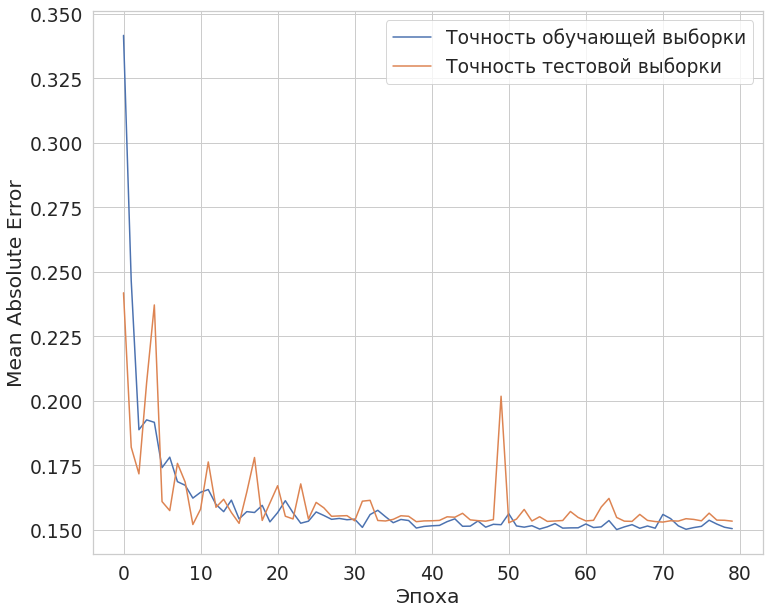

In [87]:
plt.plot(history.history['loss'],
         label = 'Точность обучающей выборки')

plt.plot(history.history['val_loss'],
         label = 'Точность тестовой выборки')
plt.xlabel('Эпоха')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

## Сохранение модели

In [63]:
import pickle

In [65]:
with open('model_nn.pkl', 'wb') as f:
  pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://5c68dc19-ec8c-4f03-bae3-1e2cf75f7063/assets


In [ ]:
model.predict([X])


In [92]:
with open('model_nn.pkl', 'rb') as f:
  load_model = pickle.load(f)

In [93]:
load_model.predict([X])

array([[0.4824924 ],
       [0.48250028],
       [0.48228008],
       [0.4823767 ],
       [0.48212382],
       [0.48230857],
       [0.4827146 ],
       [0.4822189 ],
       [0.48225886],
       [0.48254895],
       [0.48229387],
       [0.4823217 ],
       [0.4823123 ],
       [0.48247024],
       [0.48262048],
       [0.48262963],
       [0.48212582],
       [0.48242426],
       [0.4827277 ],
       [0.48243707],
       [0.48249513],
       [0.48258215],
       [0.48244804],
       [0.48244807],
       [0.48254266],
       [0.48237708],
       [0.48244357],
       [0.48240522],
       [0.48270816],
       [0.48249155],
       [0.48262855],
       [0.48237097],
       [0.48232132],
       [0.48242736],
       [0.4822865 ],
       [0.482431  ],
       [0.48256558],
       [0.4823279 ],
       [0.48234737],
       [0.4825284 ],
       [0.48248148],
       [0.48218426],
       [0.48263764],
       [0.48241165],
       [0.48296285],
       [0.48222214],
       [0.48239094],
       [0.482